In [14]:
PATH_TRAINED_MODEL = './runs/plankton_258_protos/checkpoints/net_trained_60'
LOG_DIR = './runs/plankton_258_protos_rfecv' #new model is also saved here

In [2]:
%matplotlib inline

In [3]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv("testfile_2023-11-11-14:49:07_random_forest")

<AxesSubplot:>

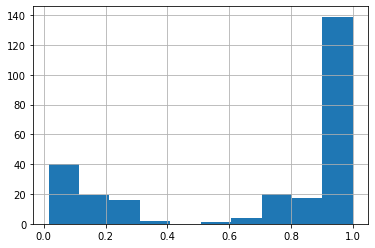

In [4]:
df.drop(columns='labels').mean(axis=0).hist()

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [8]:
estimator = RandomForestClassifier()

selector = RFECV(estimator, step=10, cv=3, scoring='f1_macro', verbose=1)

In [9]:
%%time
selector = selector.fit(df.drop(columns=['labels']).values, df['labels'].values)

Fitting estimator with 258 features.
Fitting estimator with 248 features.
Fitting estimator with 238 features.
Fitting estimator with 228 features.
Fitting estimator with 218 features.
Fitting estimator with 208 features.
Fitting estimator with 198 features.
Fitting estimator with 188 features.
Fitting estimator with 178 features.
Fitting estimator with 168 features.
Fitting estimator with 158 features.
Fitting estimator with 148 features.
Fitting estimator with 138 features.
Fitting estimator with 128 features.
Fitting estimator with 118 features.
Fitting estimator with 108 features.
Fitting estimator with 98 features.
Fitting estimator with 88 features.
Fitting estimator with 78 features.
Fitting estimator with 68 features.
Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 features.
Fitting estimator with 18 features.
Fitting estimator with 8 features.
Fitting estimator with 258 features.
Fitting esti

In [10]:
mask = selector.support_
print('Number of dropped prototypes:', sum(~mask))
proto_kept, proto_dropped = np.where(mask)[0], np.where(~mask)[0]

Number of dropped prototypes: 40


In [11]:
to_sample = 10 # number of sampled prototypes for dropped and kept

In [15]:
from proto_drop_vis import visualize_topk_dropped

visualize_topk_dropped(proto_dropped, proto_kept, LOG_DIR, PATH_TRAINED_MODEL, 'dropped_kept_protos__258_rfecv', k=10, to_sample=to_sample, num_features=258)

CUDA device set without id specification
Device used:  cuda with id [0]
Number of prototypes set from 768 to 258 . Extra 1x1 conv layer added. Not recommended.
chosen network is convnext
Pretrained network loaded
Num classes (k) =  86 ['Amphidinium_sp', 'Asterionellopsis', 'Cerataulina', 'Cerataulina_flagellate', 'Ceratium'] etc.
Visualizing prototypes for topk...


/sw/arch/RHEL8/EB_production/2022/software/PyTorch/1.12.0-foss-2022a-CUDA-11.7.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

0 prototypes do not have any similarity score > 0.1. Will be ignored in visualisation.



Visualizing topk: 100% 3096/3096 [00:37<00:00, 81.78it/s]

Abstained:  0
